# Neutrino Project 

//Insert version information here//

## Incoming Neutrino Energy Spectrum 
(Ref: Stars as Laboratories for Fundamental Physics - Chap.10 Solar Neutrinos)

We consider only $pp$ neutrinos and $^8{\rm B}$ neutrinos.

$(1)$ For $pp$ neutrinos, $\frac{dN}{dE_{\nu}}=A(Q+m_e-E_{\nu})[(Q+m_e-E_{\nu})^2-m_e^2]^{1/2}E_{\nu}^2F$ 

$A=193.9\, {\rm Mev^{-5}}$ is a normalied constant, $Q=0.420\,{\rm Mev}$ is the maximum $\nu_e$ energy, $F$ is a factor closed to 1. 


In [48]:
import numpy as np

#create array from 0 to .42 inclusively with step .0001
E_pp = np.arange(0,.4201,.0001)
#using formula (1), we obtain number pp neutrinos / MeV
NE_pp=193.9*(0.931-E_pp)* \
np.power((np.power((0.931-E_pp),2)-0.511**2),(1/2))* \
(E_pp*E_pp) 
#take the real part
NE_pp=np.real(NE_pp)

Normalize the spectrum with the $pp$ neutrino flux at earth: $\varphi_{pp}=5.94\times10^{10}\,{\rm cm^{-2}s^{-1}}$:

In [49]:
NE_pp_earth=NE_pp*5.94*10**10/np.trapz(NE_pp,E_pp) # number /cm^2 /s /MeV at Earth

For $^8{\rm B}$ neutrinos, an analytical approximation is:

$(2)$  $\frac{dN}{dE_{\nu}}=8.52\times10^{-6}(15.1-E_{\nu})^{2.75}E_{\nu}^2$

In [50]:
#create array from 0 to 15.1 inclusively with step .0001
E_B = np.arange(0,15.1001,.0001)
difference = 15.1-E_B
#this element should be 0, but due to rounding errors, it will instead be negative
#this will cause an invalid value in np.power, so its value is just set to 0
difference[len(difference)-1] = 0
#formula (2)
NE_B=8.52*10**(-6)*np.power((difference),2.75)*(E_B*E_B); # number / MeV
#take the real part
NE_B=np.real(NE_B);

Normalize the spectrum with the $^8{\rm B}$ neutrino flux at earth: $\varphi_{B}=6.6\times10^6\,{\rm cm^{-2}s^{-1}}$:

In [51]:
NE_B_earth=NE_B*6.6*10**6/np.trapz(NE_B,E_B) #number /cm^2 /s /MeV at Earth

Plots of the fluxes:

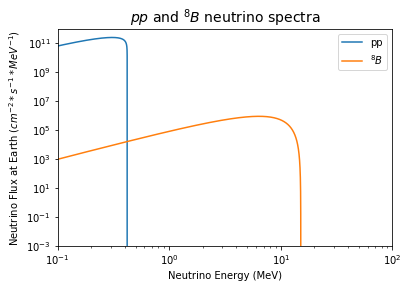

In [52]:
import matplotlib.pyplot as plt

plt.loglog(E_pp,NE_pp_earth,E_B,NE_B_earth)

plt.xlabel('Neutrino Energy (MeV)')
plt.ylabel('Neutrino Flux at Earth $(cm^{-2}*s^{-1}*MeV^{-1})$')
plt.title('$pp$ and $^8B$ neutrino spectra', fontsize = 14)
plt.legend(('pp','$^8B$'));
plt.xlim([0.1, 100])
plt.ylim([0.001, 10**12])
plt.show()

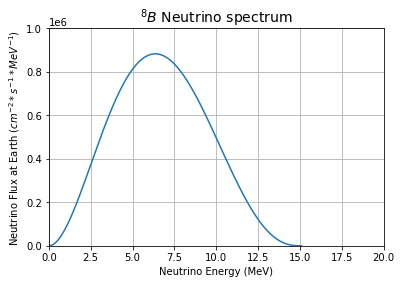

In [53]:
plt.plot(E_B, NE_B_earth)

plt.xlabel('Neutrino Energy (MeV)')
plt.ylabel('Neutrino Flux at Earth $(cm^{-2}*s^{-1}*MeV^{-1})$')
plt.title('$^8B$ Neutrino spectrum', fontsize = 14)
plt.xlim([0,20])
plt.ylim([0,10**6])
plt.ticklabel_format(axis='y', style='sci', scilimits=(0,6))
plt.grid(True)
plt.show()

## Event rate
(Ref: 
[1] Strigari, Louis E. "Neutrino coherent scattering rates at direct dark matter detectors." *New Journal of Physics* 11.10 (2009): 105011;

[2] Baudis, L., et al. "Neutrino physics with multi-ton scale liquid xenon detectors." *Journal of cosmology and astroparticle physics* 2014.01 (2014): 044.)

Neutrino-nucleus scattering cross section (neglecting term in brackets of -Er/Enu):

$(3)$ $\frac{d\sigma(E_{\nu},E_r)}{dE_r}=\frac{G_f^2}{4\pi}Q_W^2M\left(1-\frac{ME_r}{2E_{\nu}^2}\right)F^2(E_r)$

$Q_W=N-(1-4\sin^2\theta_w)Z$ is the weak nuclear charge, $M=(N+Z)*931{\rm Mev}$ is the nucleus mass, the form factor $F$ is taken as 1. Z=54, and N=77 for average of different isotopes. Z+N=131.  We should have another factor: $(\hbar c)^2$, due to dimension request. 

Event rate is: 

$(4)$ 
$
\frac{dR}{dE_r}=\mathcal{N}\int_{E_{\nu}\,{\rm min}}^{\infty}\frac{dN}{dE_{\nu}}\frac{d\sigma(E_{\nu}.E_r)}{dE_r}dE_{\nu}$

where $\mathcal{N}$ is number density in unit mass of LXe ( # nuclei / g ). The constant part is: 


$\mathcal{N}\frac{G_f^2}{4\pi}(\hbar c)^2Q_W^2M$
$\approx 0.46\times10^{22}\frac{(1.166\times 10^{-5}\times10^{-12})^2}{4\pi}(6.582\times10^{-19}\times3\times10^{10})^2(78-(1-4*0.231)*54)^2*130*931.5*10^3$
$=1.27\times10^{-17}\,{\rm cm^2g^{-1}keV^{-1}}$

$(5)$ For a fixed neutrino energy $E_{\nu}$, the max nuclear recoil energy is: $E^{({\rm max})}_r=2E_{\nu}^2/M$.

$(6)$ For a fixed nuclear recoil energy , the min neutrino energy is: $E_{\nu}^{\rm min}=\sqrt{ME_r/2}$.

For $pp$ neutrinos:

In [54]:
import math

#returns the first index after the starting index that is non negative
def findFirstNonNegIndex(array, startingIndex):
    for i in range(startingIndex, len(array)):
        if array[i] >=0:
            return i
    #this case should never be reach
    raise RuntimeError('no positive values')
    
#energy spectrum of pp neutrinos in keV
E_pp_keV = E_pp*(10**3)
#the max nuclear recoil energy produced by a pp neutrino with max kinetic energy
Er_pp_max_keV = 2*(0.42*10**3)**2/(131*931.5*10**3) #from (5)
#spectrum of recoil energies
Er_pp_keV = (10**(-3))*np.arange(0,Er_pp_max_keV*1000,0.001)
# LUX event rates
RE_pp = np.empty([len(Er_pp_keV)])
#min neutrino kinetic energy required to obtain a given nuclear recoil energy
E_min_keV = np.empty([len(Er_pp_keV)])

"""
The first element of E_pp_keV is 0, so later on when Er_pp_keV is taken to the -2nd power, which produces warnings.
This invalid element produces a NaN value, but it is immediately set to 0,
so it is not an issue and the warnings can be ignored. 
"""

#index of the first energy that is at least as large as the min kinetic energy required for a recoil energy
minEnergyIndex = 0

for i in range(0,len(Er_pp_keV)):
    #from formula(6)
    E_min_keV[i] = math.sqrt(131*931.5*(10**3)*Er_pp_keV[i]/2)
    minEnergyIndex = findFirstNonNegIndex(E_pp_keV-E_min_keV[i],minEnergyIndex)
    #integrand and constant from formula (4)
    integrand = 1.27*(10**(-17))*(NE_pp_earth/(10**3))*    \
    (1-65.5*931.5*(10**3)*Er_pp_keV[i]*    \
     np.power(E_pp_keV,-2)) # Form Factor = 1
    RE_pp[i] = np.trapz(integrand[minEnergyIndex:len(E_pp)],E_pp_keV[minEnergyIndex:len(E_pp)])
    if math.isnan(RE_pp[i]) is True:
        RE_pp[i] = 0

#for some reason, the matlab RE_pp_final contains negative values, which does not make sense
#the python result does not, thus the outputs are slightly different

#convert to events/year
RE_pp_final=RE_pp*365*24*3600*(10**6)


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: divide by zero encountered in power
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:36: RuntimeWarning: invalid value encountered in multiply


For $^8{\rm B}$ neutrinos:

In [55]:
#energy spectrum of ^8B neutrinos in keV
E_B_keV = E_B*(10**3)#convert from MeV to keV
#the max nuclear recoil energy produced by an ^8B neutrino with max kinetic energy
Er_B_max_keV =2*(15.1*10**3)**2/(131*931.5*10**3) #from (5)
#spectrum of recoil energies
Er_B_keV = np.arange(0,Er_B_max_keV,0.001)
#LUX event rate
RE_B = np.empty([len(Er_B_keV)])
#min neutrino kinetic energy required to obtain a given nuclear recoil energy
E_min_keV = np.empty([len(Er_B_keV)])

"""
The first element of E_B_keV is 0, so later on when Er_B_keV is taken to the -2nd power, which produces warnings.
This invalid element produces a NaN value, but it is immediately set to 0,
so it is not an issue and the warnings can be ignored.
"""

#index of the first energy that is at least as large as the min kinetic energy required for a recoil energy
minEnergyIndex = 0
for i in range(0,len(Er_B_keV)):
    #from formula(6)
    E_min_keV[i] = math.sqrt(131*931.5*(10**3)*Er_B_keV[i]/2)
    minEnergyIndex = findFirstNonNegIndex(E_B_keV-E_min_keV[i],minEnergyIndex)
    #integrand and constant from formula (4)
    integrand = 1.27*10**(-17)*((NE_B_earth/(10**3))*  \
                                (1-65.5*931.5*10**3*Er_B_keV[i]*   \
                                 1/(E_B_keV*E_B_keV))) # Form Factor = 1
    RE_B[i] = np.trapz(integrand[minEnergyIndex:len(E_B)],E_B_keV[minEnergyIndex:len(E_B)])
    if math.isnan(RE_B[i]) is True:
        RE_B[i] = 0
        
RE_B_final=RE_B*365*24*3600*(10**6)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: divide by zero encountered in true_divide
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in multiply


Differential event plots

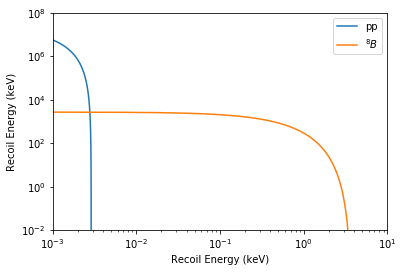

In [56]:
plt.loglog(Er_pp_keV,RE_pp_final,Er_B_keV, RE_B_final)

plt.ylim([10**(-2),10**8])
plt.xlim([.001,10])
plt.xlabel('Recoil Energy (keV)')
plt.ylabel('Recoil Energy (keV)')
plt.legend(('pp','$^8B$'));
plt.show()

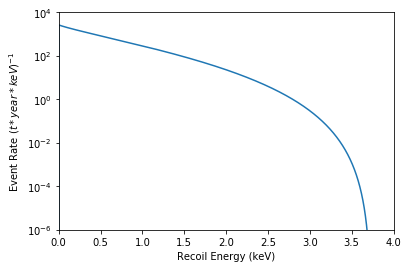

In [57]:
plt.plot(Er_B_keV, RE_B_final)

plt.yscale('log')
plt.xlabel('Recoil Energy (keV)')
plt.ylabel('Event Rate $(t*year*keV)^{-1}$')
plt.ylim([10**(-6), 10**4])
plt.xlim([0,4])
plt.show()

## Event above an energy threshold

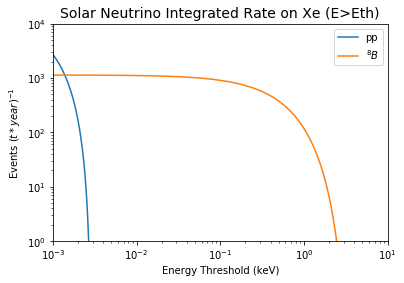

In [58]:
Len_pp = len(Er_pp_keV)
Len_B = len(Er_B_keV)
#Thre_X[i] is the events per ton*year with a recoil energy greater than Er_X_keV[i]
Thre_pp = np.empty([Len_pp])
Thre_B = np.empty([Len_B])

for i in range(0, Len_pp):
    #integrate from the first event with sufficient recoil energy to the last
    Thre_pp[i] = np.trapz(RE_pp_final[i:Len_pp],Er_pp_keV[i:Len_pp])
for j in range(0, Len_B):
    Thre_B[j] = np.trapz(RE_B_final[j:Len_B],Er_B_keV[j:Len_B])

plt.loglog(Er_pp_keV, Thre_pp, Er_B_keV, Thre_B)

plt.title('Solar Neutrino Integrated Rate on Xe (E>Eth)', fontsize = 14)
plt.xlabel('Energy Threshold (keV)')
plt.ylabel('Events $(t*year)^{-1}$')
plt.legend(('pp','$^8B$'));
plt.ylim([1,10**4])
plt.xlim([10**(-3),10])
plt.show()

pcolor

In [59]:
#%%capture
#!rm nest_py_interface.cpython-36m-darwin.so
#!python setup.py build_ext --inplace

In [60]:
numSims = 100

In [61]:
#get s1 aqnd s2 signals
import nest_py_interface
import random

npw8B = nest_py_interface.nest_py_wrapper_std()
npw8B.print_result_or_not(0)
exposure = 5600*1000*numSims
B8results = npw8B.testNEST([str(exposure), '8B','0','4','310','-1','10'])
s1 = np.absolute(B8results.s1_n_hits)
s2 = np.absolute(B8results.s2_raw_area_phd)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log10


Text(0.5,1,'Observation Graph with cumulative numbers, 100 sims')

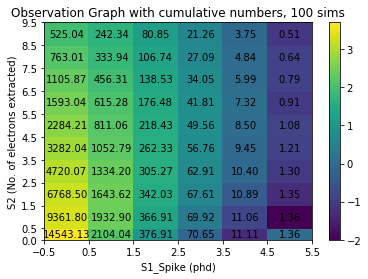

In [62]:
from numpy import inf
from decimal import Decimal

#bin edges
xedges = np.arange(-.5,8.5,1)
lenXEdge= len(xedges)
yedges = [0] + (np.arange(.5,51.5,1)).tolist()
lenYEdge = len(yedges)
hist = np.histogram2d(s1,s2/90,bins = (xedges,yedges))

#convert from LUX to LZ exposure
eventMatrix = hist[0]/100#*5.6/365/(num/10000)
#transpose due to the way pcolormesh works
eventMatrix = eventMatrix.transpose()

numXBins = 6
numYBins = 10
eventMatrixToGraph = np.log10(eventMatrix[0:numYBins,0:numXBins])
eventMatrixToGraph[eventMatrixToGraph == -inf] = 0

plt.pcolormesh(xedges[:numXBins+1],yedges[:numYBins+1],eventMatrixToGraph)
plt.colorbar()


for i in range(0,numXBins):
    for j in range(0,numYBins):
        eventSum = round(Decimal(np.sum(eventMatrix[j:,i:])),2)
        if j is not 0:
            plt.text(i,j,eventSum,horizontalalignment='center',verticalalignment='center')
        if j is 0:
            plt.text(i,j+.25,eventSum,horizontalalignment='center',verticalalignment='center')
        
plt.xlabel('S1_Spike (phd)')
plt.ylabel('S2 (No. of electrons extracted)')
plt.xticks(xedges[:numXBins+1])
plt.yticks(yedges[:numYBins+1])
plt.title('Observation Graph with cumulative numbers, 100 sims')

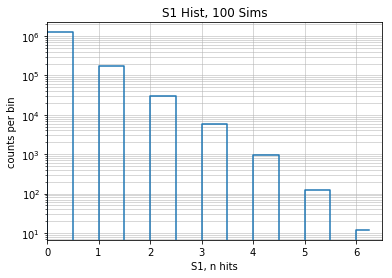

In [63]:
#Histogram of s1_hit
absS1_hit = np.absolute(B8results.s1_n_hits)
#absS1_hit[absS1_hit == -inf] = 0
#absS1_hit[absS1_hit == inf] = 0
bins = np.arange(-.5,7,.5)
hist, bin_edges = np.histogram(absS1_hit,bins)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
plt.step(bin_centers, hist, where = 'mid')

plt.xlim([0,6.5])
plt.yscale('log')
plt.ylabel("counts per bin")
plt.xlabel("S1, n hits")
plt.title("S1 Hist, 100 Sims")
plt.grid(True,which='both',linewidth=.5)
plt.show()

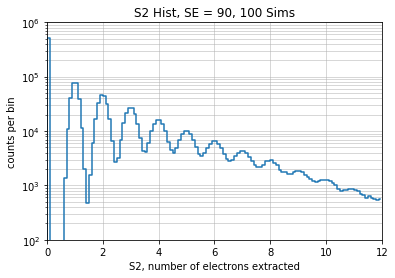

In [64]:
#Histogram of s2
absS2_rawAphd = np.absolute(B8results.s2_raw_area_phd)/90
bins = np.arange(-.1,12.1,.1)
hist, bin_edges = np.histogram(absS2_rawAphd,bins)

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2.
plt.step(bin_centers, hist, where = 'mid')

plt.xlim([0,12])
plt.yscale('log')
plt.ylim([10**2, 10**6])
plt.grid(True,which='both',linewidth=.5)
plt.ylabel("counts per bin")
plt.xlabel("S2, number of electrons extracted")
plt.title("S2 Hist, SE = 90, 100 Sims")
plt.show()

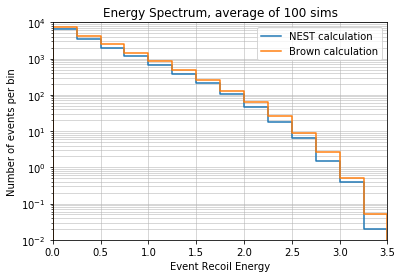

In [65]:
#Recoil Energy Spectra Comparison
NESTRecoilEnergy = B8results.deposite_energy
normalizedEventRate = RE_B_final/np.sum(RE_B_final)
BrownRecoilEnergy = np.random.choice(Er_B_keV, int(1130000*numSims*5.6/365),p = normalizedEventRate)

bins = np.arange(-.25,4.25,.25)
bin_centers = (bins[:-1] + bins[1:]) / 2.
brownBinValues = np.histogram(BrownRecoilEnergy, bins)[0]/numSims
nestBinValues = np.histogram(NESTRecoilEnergy, bins)[0]/numSims

plt.step(bin_centers,nestBinValues, where = 'mid', label = 'NEST calculation')
plt.step(bin_centers,brownBinValues, where = 'mid', label = 'Brown calculation')

plt.yscale('log')
plt.xlabel('Event Recoil Energy')
plt.ylabel('Number of events per bin')
plt.title('Energy Spectrum, average of 100 sims')
plt.legend()
plt.xlim([0, 3.5])
plt.ylim([10**(-2),10**4])
plt.grid(True,which='both',linewidth=.5)
plt.show()

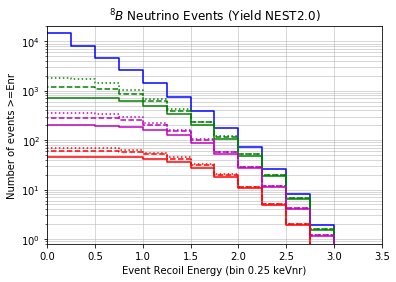

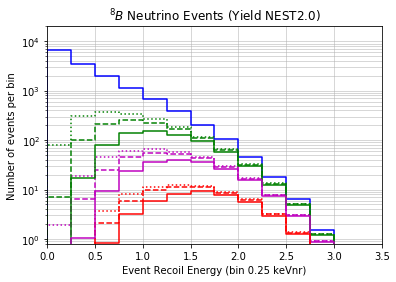

In [66]:
#integral and differential plots
bins = np.arange(-.25,4.25,.25)
bin_centers = (bins[:-1] + bins[1:]) / 2.

totalHist = np.histogram(NESTRecoilEnergy, bins)[0]/numSims

s1Hits = np.absolute(B8results.s1_n_hits)
s2RAphd = np.absolute(B8results.s2_raw_area_phd)

#integral
plt.figure(0)
                      #reverse cumsum  
plt.step(bin_centers, np.cumsum(totalHist[::-1])[::-1], where = 'mid', color = 'b')
plt.yscale('log')
plt.ylim([.8, 2*10**4])
plt.xlim([0, 3.5])
plt.ylabel('Number of events >=Enr')
plt.xlabel('Event Recoil Energy (bin 0.25 keVnr)')
plt.title('$^8B$ Neutrino Events (Yield NEST2.0)')
plt.grid(True,which='both',linewidth=.5)

#differential
plt.figure(1)
plt.step(bin_centers, totalHist, where = 'mid', color = 'b')
plt.ylim([.8, 2*10**4])
plt.xlim([0, 3.5])
plt.yscale('log')
plt.ylabel('Number of events per bin')
plt.xlabel('Event Recoil Energy (bin 0.25 keVnr)')
plt.title('$^8B$ Neutrino Events (Yield NEST2.0)')
plt.grid(True,which='both',linewidth=.5)

linestyles = [':','--','-']
colors = ['g','m','r']
s2RAphdCuts = [1,3,5]
s1HitCuts = [1,2,3]

for i in range(0, len(s2RAphdCuts)):
    s2Cut = s2RAphdCuts[i]*90
    l = linestyles[i]
    for j in range(0, len(s1HitCuts)):
        s1Cut = s1HitCuts[j]
        col = colors[j]
        hist = np.histogram(np.array(NESTRecoilEnergy)[(s1Hits >= s1Cut)&(s2RAphd >= s2Cut)],bins)[0]/numSims
        #just hist but reverse cumulative summed
        integralHist = np.cumsum(hist[::-1])[::-1]
        
        #integral
        plt.figure(0)
        plt.step(bin_centers, integralHist, where = 'mid', color = col, linestyle = l)
        
        #differential
        plt.figure(1)
        plt.step(bin_centers, hist, where = 'mid', color = col, linestyle = l)
plt.show()